In [58]:
# Imports

# pandas
import pandas as pd
from pandas import Series,DataFrame

# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [59]:
# get rossmann, store, & test csv files as a DataFrame
train_df  = pd.read_csv("../input/train.csv")
store_df     = pd.read_csv("../input/store.csv")
test_df      = pd.read_csv("../input/test.csv")

### Basic review ###

In [60]:
train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [61]:
test_df.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1,1,0,0
1,2,3,4,2015-09-17,1,1,0,0
2,3,7,4,2015-09-17,1,1,0,0
3,4,8,4,2015-09-17,1,1,0,0
4,5,9,4,2015-09-17,1,1,0,0


In [62]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270,9,2008,0,NaN,NaN,NaN
1,2,a,a,570,11,2007,1,13,2010,"Jan,Apr,Jul,Oct"
2,3,a,a,14130,12,2006,1,14,2011,"Jan,Apr,Jul,Oct"
3,4,c,c,620,9,2009,0,NaN,NaN,NaN
4,5,a,a,29910,4,2015,0,NaN,NaN,NaN


In [63]:
print train_df.dtypes

Store             int64
DayOfWeek         int64
Date             object
Sales             int64
Customers         int64
Open              int64
Promo             int64
StateHoliday     object
SchoolHoliday     int64
dtype: object


In [64]:
# Check if there is any null values
print train_df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
Store            1017209 non-null int64
DayOfWeek        1017209 non-null int64
Date             1017209 non-null object
Sales            1017209 non-null int64
Customers        1017209 non-null int64
Open             1017209 non-null int64
Promo            1017209 non-null int64
StateHoliday     1017209 non-null object
SchoolHoliday    1017209 non-null int64
dtypes: int64(7), object(2)
memory usage: 77.6+ MB
None


In [65]:
train_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1017209.000000,1017209.000000,1017209.000000,1017209.000000,1017209.000000,1017209.000000,1017209.000000
mean,558.429727,3.998341,5773.818972,633.145946,0.830107,0.381515,0.178647
std,321.908651,1.997391,3849.926175,464.411734,0.375539,0.485759,0.383056
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,280.000000,2.000000,3727.000000,405.000000,1.000000,0.000000,0.000000
50%,558.000000,4.000000,5744.000000,609.000000,1.000000,0.000000,0.000000
75%,838.000000,6.000000,7856.000000,837.000000,1.000000,1.000000,0.000000
max,1115.000000,7.000000,41551.000000,7388.000000,1.000000,1.000000,1.000000


In [66]:
#train_df.dtypes

In [67]:
train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [68]:
# Watch out for null values
print store_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1115 entries, 0 to 1114
Data columns (total 10 columns):
Store                        1115 non-null int64
StoreType                    1115 non-null object
Assortment                   1115 non-null object
CompetitionDistance          1112 non-null float64
CompetitionOpenSinceMonth    761 non-null float64
CompetitionOpenSinceYear     761 non-null float64
Promo2                       1115 non-null int64
Promo2SinceWeek              571 non-null float64
Promo2SinceYear              571 non-null float64
PromoInterval                571 non-null object
dtypes: float64(5), int64(2), object(3)
memory usage: 95.8+ KB
None


In [126]:
store_df.iloc[0:10]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,OpenDay,CompetitorOpenDay
0,1,c,a,1270,9,2008,0,NaN,NaN,NaN,2013-01-02,2008-09-01
1,2,a,a,570,11,2007,1,13,2010,"Jan,Apr,Jul,Oct",2013-01-02,2007-11-01
2,3,a,a,14130,12,2006,1,14,2011,"Jan,Apr,Jul,Oct",2013-01-02,2006-12-01
3,4,c,c,620,9,2009,0,NaN,NaN,NaN,2013-01-02,2009-09-01
4,5,a,a,29910,4,2015,0,NaN,NaN,NaN,2013-01-02,2015-04-01
5,6,a,a,310,12,2013,0,NaN,NaN,NaN,2013-01-02,2013-12-01
6,7,a,c,24000,4,2013,0,NaN,NaN,NaN,2013-01-02,2013-04-01
7,8,a,a,7520,10,2014,0,NaN,NaN,NaN,2013-01-02,2014-10-01
8,9,a,c,2030,8,2000,0,NaN,NaN,NaN,2013-01-02,2000-08-01
9,10,a,a,3160,9,2009,0,NaN,NaN,NaN,2013-01-02,2009-09-01


### Review the distribution of records, grouped by various attributes ###

In [70]:
train_df.columns

Index([u'Store', u'DayOfWeek', u'Date', u'Sales', u'Customers', u'Open',
       u'Promo', u'StateHoliday', u'SchoolHoliday'],
      dtype='object')

In [71]:
# Display percentage of unique values of these fields
for col in ['Open', 'StateHoliday', 'SchoolHoliday', 'Promo']:
    sizes = train_df.groupby(col).size()
    print sizes / sizes.sum()
    print
    


Open
0    0.169893
1    0.830107
dtype: float64

StateHoliday
0    0.128855
0    0.840621
a    0.019917
b    0.006577
c    0.004031
dtype: float64

SchoolHoliday
0    0.821353
1    0.178647
dtype: float64

Promo
0    0.618485
1    0.381515
dtype: float64



In [72]:
store_df.columns

Index([u'Store', u'StoreType', u'Assortment', u'CompetitionDistance',
       u'CompetitionOpenSinceMonth', u'CompetitionOpenSinceYear', u'Promo2',
       u'Promo2SinceWeek', u'Promo2SinceYear', u'PromoInterval'],
      dtype='object')

In [73]:
# Display percentage of unique values of these fields
for col in ['StoreType', 'Assortment']:
    sizes = store_df.groupby(col).size()
    print sizes / sizes.sum()
    print
    


StoreType
a    0.539910
b    0.015247
c    0.132735
d    0.312108
dtype: float64

Assortment
a    0.531839
b    0.008072
c    0.460090
dtype: float64



### Data processing ###

Fix StateHoliday

In [74]:
# Got a warning about column 7 during import.  Check its unqiue value
print pd.unique(train_df.StateHoliday)
print pd.unique(test_df.StateHoliday)

['0' 'a' 'b' 'c' 0]
['0' 'a']


In [75]:
# Fix it by change all 0 to '0'
train_df.loc[train_df['StateHoliday'] == 0, 'StateHoliday'] = '0'
print pd.unique(train_df.StateHoliday)

['0' 'a' 'b' 'c']


Other tasks

In [76]:
# Convert the date column in train and test data
train_df['Date'] = pd.to_datetime(train_df['Date'], format="%Y-%m-%d")
test_df['Date'] = pd.to_datetime(test_df['Date'], format="%Y-%m-%d")

In [77]:
# Keep only records where the store is open
train_df = train_df[train_df['Open'] == 1]

# Keep only records with non-zero sales
train_df = train_df[train_df['Sales'] > 0]


For each store, find its first opening day and merge it into store_df

In [78]:
train_by_Store_df = train_df.groupby('Store')
storeOpenDays = train_by_Store_df['Date'].min()
#pd.unique(storeOpenDays)
#storeOpenDays[storeOpenDays != np.datetime64('2013-01-02')]

d = pd.DataFrame(storeOpenDays)
d = d.rename(columns = {'Date':'OpenDay'})
store_df = pd.merge(store_df, d, left_on = 'Store', right_index = True) 

For each store, convert it's competitor open day into a Date column

In [79]:
competitorOpenDay = store_df.apply(lambda row: np.nan 
        if pd.isnull(row['CompetitionOpenSinceMonth']) or pd.isnull(row['CompetitionOpenSinceYear'])
        else np.datetime64("%d-%02d-01" % (int(row['CompetitionOpenSinceYear']), int(row['CompetitionOpenSinceMonth']))), 
        axis=1)

store_df["CompetitorOpenDay"] = competitorOpenDay

For those stores with empty CompetitorOpenDay date, set it to the same as StoreOpenDay

In [80]:
store_df.ix[:, 'CompetitorOpenDay'] = store_df["CompetitorOpenDay"].fillna(store_df['OpenDay'])
#store_df.ix[:,['CompetitorOpenDay', 'OpenDay']]

In [81]:
# Merge store data into train data
train_df = pd.merge(train_df, store_df, on="Store")

In [82]:
# Use Date as the index.  This will make exploration much easier.
train_df = train_df.set_index('Date')

### General sales average over time ###

In [83]:
monthly = train_df.resample('M', how='mean')
weekly = train_df.resample('W', how='mean')

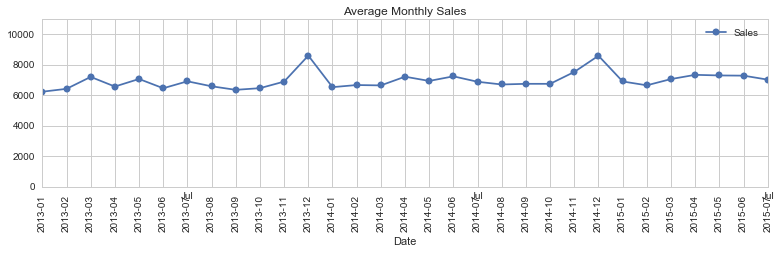

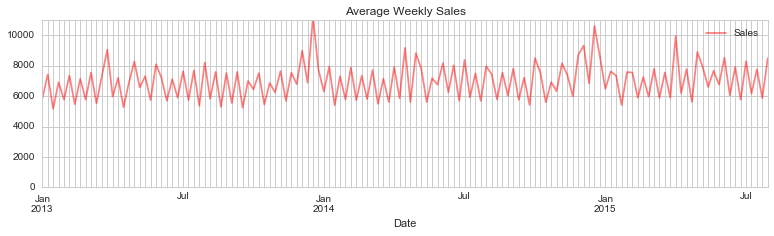

In [84]:
ax1 = monthly.plot(y='Sales', title = "Average Monthly Sales", marker='o',figsize=(13,3),
             rot=0, ylim=(0,11000), xticks=monthly.index.tolist(), legend=True)
ax1.set_xticklabels(["%d-%02d" % (x.year, x.month) for x in monthly.index.tolist()], rotation=90);

ax2 = weekly.plot(y='Sales', title="Average Weekly Sales", color='r', alpha=0.5,  figsize=(13,3),
             rot=0, ylim=(0,11000), xticks=weekly.index.tolist(), legend=True)

#handles, labels = ax.get_legend_handles_labels()
#lg = ax.legend(handles, ['Montly Sales', 'Weekly Sales'])

### How does various features affect sales in general?###

In [85]:
def BoxPlotGroupBy(y, group, axis):
    ax = sns.boxplot(train_df[y], groupby = train_df[group], 
                     order = np.sort(pd.unique(train_df[group])), ax = axis)
    txt = ax.set_title(y + " grouped by " + group) 
    if axis is None:
        plt.show()


/Library/Python/2.7/site-packages/seaborn/categorical.py:1613: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)
/Library/Python/2.7/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


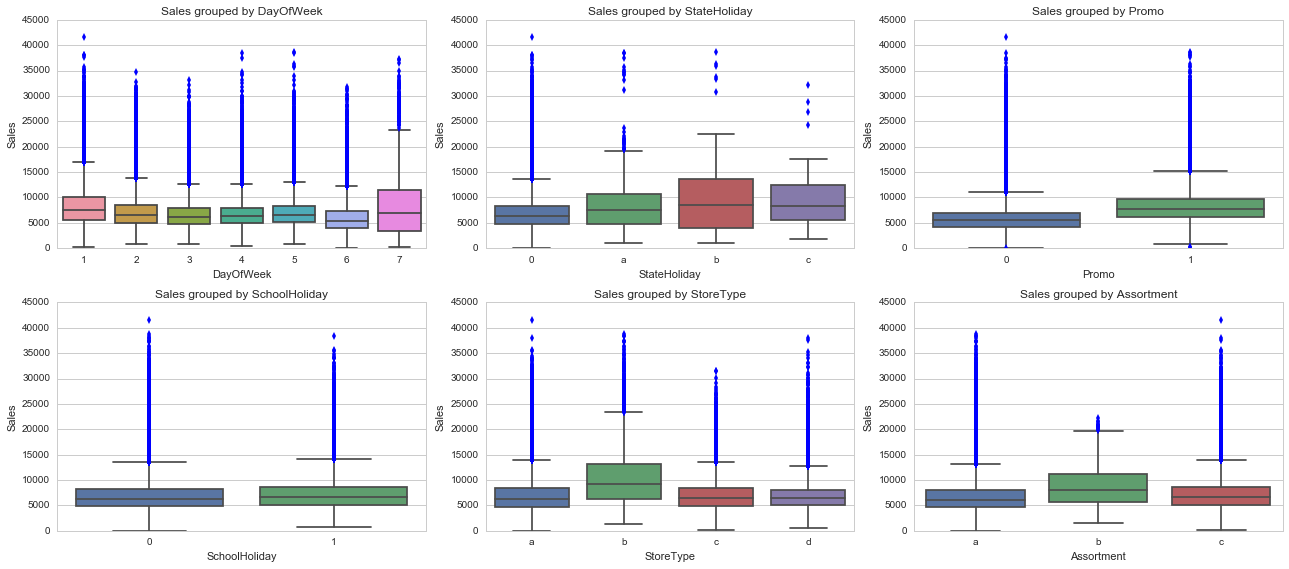

In [86]:
fig, ax_list = plt.subplots(2,3, figsize=(18,8))
ax_list = ax_list.ravel()

BoxPlotGroupBy('Sales', 'DayOfWeek', ax_list[0])
BoxPlotGroupBy('Sales', 'StateHoliday', ax_list[1])
BoxPlotGroupBy('Sales', 'Promo', ax_list[2])
BoxPlotGroupBy('Sales', 'SchoolHoliday', ax_list[3])
BoxPlotGroupBy('Sales', 'StoreType', ax_list[4])
BoxPlotGroupBy('Sales', 'Assortment', ax_list[5])
fig.tight_layout()
plt.show()

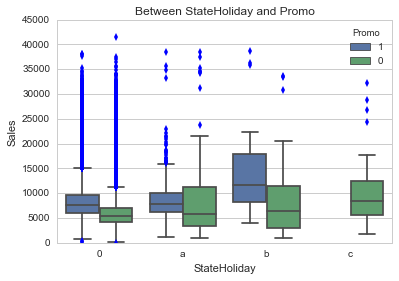

In [87]:
y = 'Sales'
ax = sns.boxplot(x = 'StateHoliday', y = 'Sales', hue = 'Promo', data = train_df)
ax.set_title("Between StateHoliday and Promo")

In [317]:
import matplotlib.dates as dates
import matplotlib.dates as mdates
from matplotlib.dates import MonthLocator, WeekdayLocator, DateFormatter

import datetime

def PlotAvgSalesByGroup(group, storeId=None, dim=None, daily=False, marker='o', alpha=0.7, **kwargs):
    stores = [None]
    if type(storeId) is list:
        stores = storeId
    else:
        stores = [storeId]
        
    if dim is None:
        dim = [1, len(stores)]
        
    fig, axises = plt.subplots(dim[0], dim[1], figsize=(15,3 * dim[0]))
    if len(stores) == 1:
        axises = [axises]
    else:
        axises = axises.ravel()

    for store, axis in zip(stores, axises):
        if store is None:
            df = train_df
            title = None
        else:
            df = train_df[train_df['Store'] == store]
            title = 'Store ' + str(store)

        train_df_by_group = df.groupby(group)
        colors = cm.rainbow(np.linspace(0, 1, len(train_df_by_group)))
        labels = []

        if not daily:
            monthly_data = train_df_by_group.resample('M', how='mean')

            for groupItem, c in zip(train_df_by_group.groups.keys(), colors):
                # Note: Here we use .loc instead of .ix, otherwise will have problem if groupItem is an integer, as
                #       df.ix[[0]] will give you the first row instead of the first level of a multi-index df
                ax = monthly_data.loc[[groupItem]].plot(y='Sales', ax=axis, marker=marker,
                         legend=False, label=None, color=c, rot=0, alpha=alpha, **kwargs)

                labels.append(str(group) + " = " + str(groupItem))

            dateRange = pd.date_range(train_df.index.min(), train_df.index.max(), freq='M')
            axis.set_xticks(range(len(dateRange)))
            axis.set_xticklabels(["%d-%02d" % (x.year, x.month) for x in dateRange], rotation=90)
        else:
            for groupItem, c in zip(train_df_by_group.groups.keys(), colors):
                d = train_df_by_group.get_group(groupItem).sort_index()
                ax = axis.plot_date(x=d.index.tolist(), y=d['Sales'].tolist(), color=c, marker=marker, 
                                    alpha=alpha, **kwargs)
                labels.append(str(group) + " = " + str(groupItem))

            axis.xaxis.set_major_locator(MonthLocator(range(1, 13), bymonthday=1, interval=1))
            axis.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
            fig.autofmt_xdate(rotation=90)
            plt.grid(True)

        axis.legend(labels, loc = 2, numpoints = 1)
        if title is not None:
            axis.set_title(title)

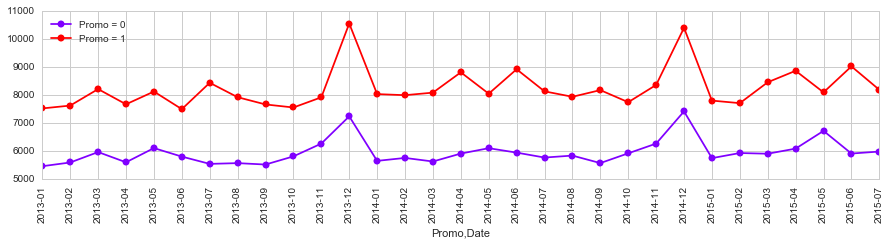

In [313]:
PlotAvgSalesByGroup('Promo')

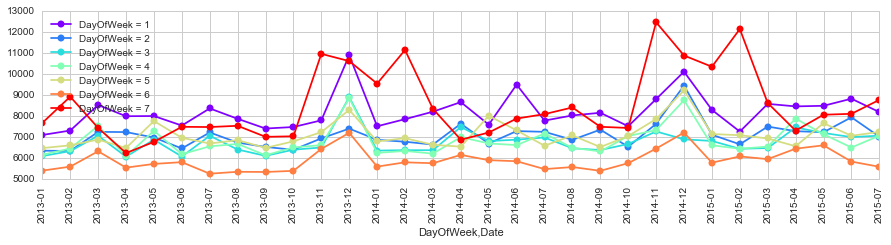

In [314]:
PlotAvgSalesByGroup('DayOfWeek')

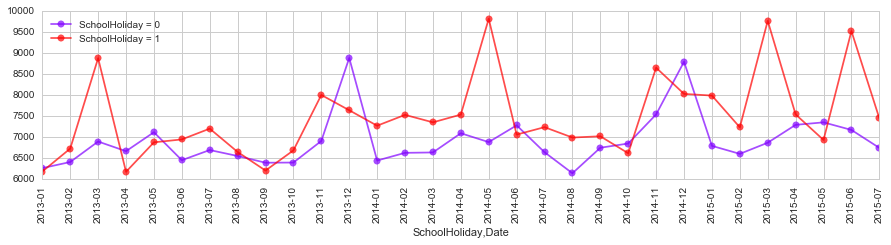

In [318]:
PlotAvgSalesByGroup('SchoolHoliday')

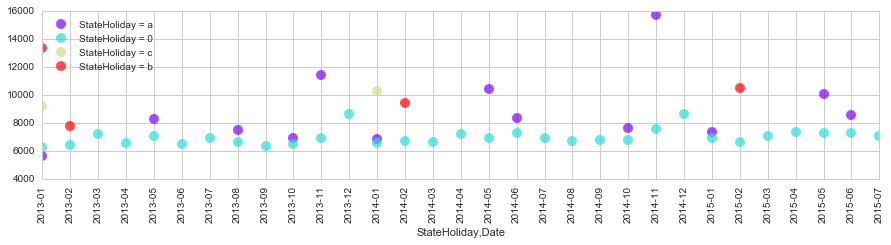

In [319]:
PlotAvgSalesByGroup('StateHoliday', linestyle='None', marker='o', markersize=10, alpha=0.7)


### Some daily graphs for specific stores ###

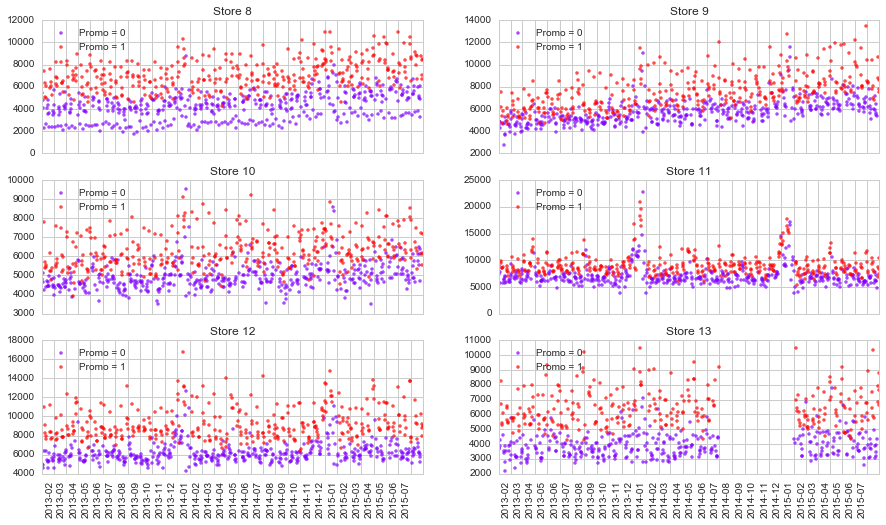

In [326]:
PlotAvgSalesByGroup('Promo', storeId=range(8,14), dim=[3,2], marker='.',daily=True, linestyle='None', alpha=0.7)

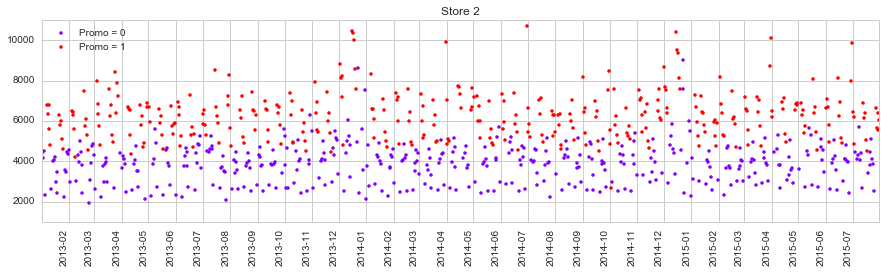

In [275]:
PlotAvgSalesByGroup('Promo', store=2, marker='.',daily=True, linestyle='None')

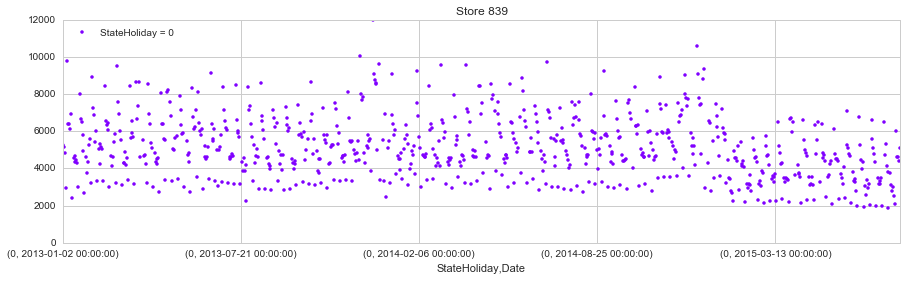

In [120]:
PlotAvgSalesByGroup('StateHoliday', store=839, marker='.',daily=True, linestyle='None')

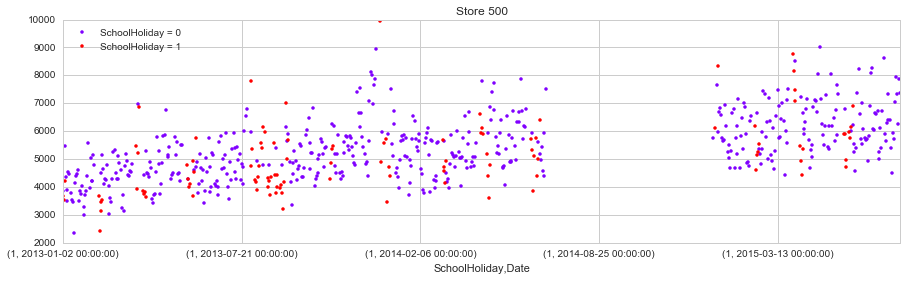

In [96]:
PlotAvgSalesByGroup('SchoolHoliday', store=500, marker='.',daily=True, linestyle='None')

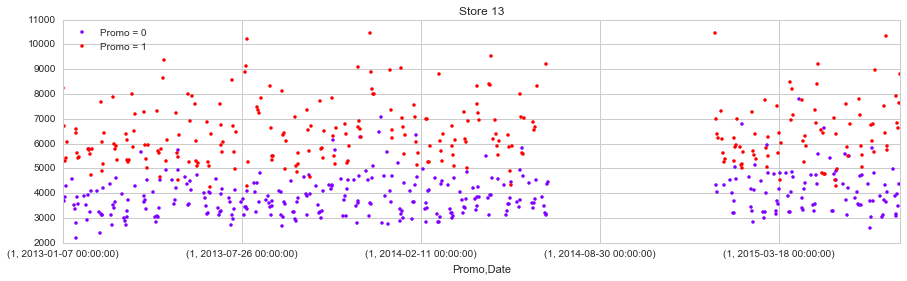

In [97]:
PlotAvgSalesByGroup('Promo', store=13, marker='.',daily=True, linestyle='None')

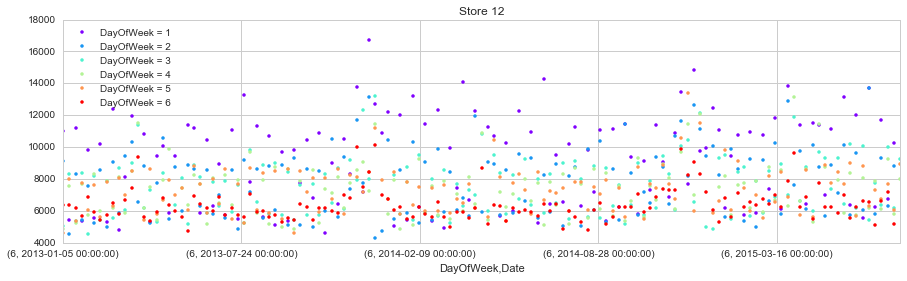

In [98]:
PlotAvgSalesByGroup('DayOfWeek', store=12, marker='.',daily=True, linestyle='None')

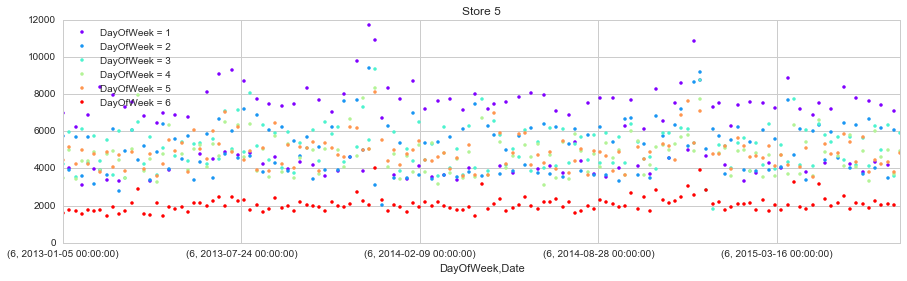

In [99]:
PlotAvgSalesByGroup('DayOfWeek', store=5, marker='.',daily=True, linestyle='None')

### Any relationship between Store Attributes and Average Monthly Sales?###

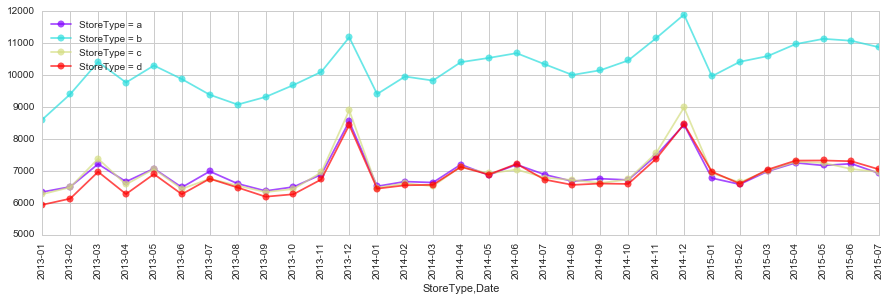

In [100]:
PlotAvgSalesByGroup('StoreType', alpha=0.7)

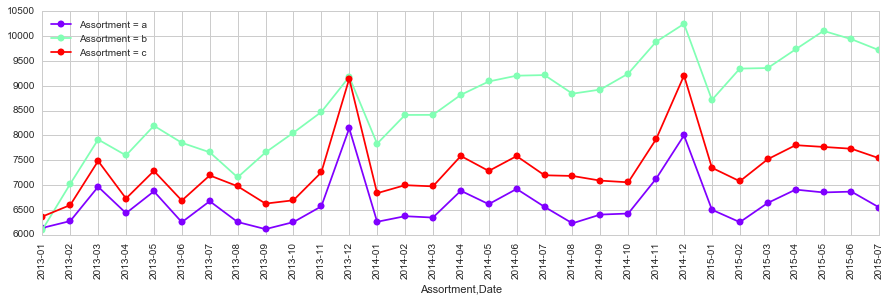

In [101]:
PlotAvgSalesByGroup('Assortment')

### Does the opening of a competitor have impact to the average sales of a store? ###


In [102]:
# How many stores have OpenDay earlier than CompetitorOpenDay?
store_openday_earlier = store_df['OpenDay'] < store_df['CompetitorOpenDay']
print "OpenDay earlier:", np.sum(store_openday_earlier)
print "Out of:", len(store_df)
print "%%: %.2f" % (np.sum(store_openday_earlier)/float(len(store_df)))

OpenDay earlier: 191
Out of: 1115
%: 0.17


In [103]:
storeid_openday_earlier = store_df[store_openday_earlier]['Store']
#store_df[store_df['Store'].isin(storeid_openday_earlier)].ix[:,['OpenDay', 'CompetitorOpenDay']]
#print storeid_openday_earlier

# The set of all records for stores which opened earlier than its competitor
train_openday_earlier_df = train_df[train_df['Store'].isin(storeid_openday_earlier)]

# Add a column to mark days which happened after a competitor has opened
train_openday_earlier_df.loc[:,'AfterCompOpened'] = train_openday_earlier_df.index >= \
                                                train_openday_earlier_df.ix[:, 'CompetitorOpenDay']
    
#print train_openday_earlier_df[train_openday_earlier_df['Store'] == 1111].ix[:,\
#                                                        ['AfterCompOpened', 'CompetitorOpenDay']]

/Library/Python/2.7/site-packages/pandas/core/indexing.py:266: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Library/Python/2.7/site-packages/pandas/core/indexing.py:426: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [112]:
# Calculate the mean sales of each store, with the days grouped by whether it's 
# before or after the competitor has opened.
s = train_openday_earlier_df.groupby(['Store', 'AfterCompOpened'])['Sales'].mean()
d = pd.DataFrame(s)
idx = pd.IndexSlice

In [114]:
# Three stores seem to have no 'average sales' when AfterCompOpened is True
s1 = set(d.loc[idx[:,True],:]['Sales'].index.get_level_values(0))
#s2 = set(d.loc[idx[:,False],:]['Sales'].index.get_level_values(0))
#s2 - s1
#len(d.loc[idx[:,False],:]['Sales'])

In [115]:
# Calculate the % change before and after
beforeSales = np.array(d.loc[idx[list(s1),False],:]['Sales']).astype('float')
afterSales = np.array(d.loc[idx[list(s1),True],:]['Sales']).astype('float')

impactToSales = ((afterSales - beforeSales) / beforeSales) * 100

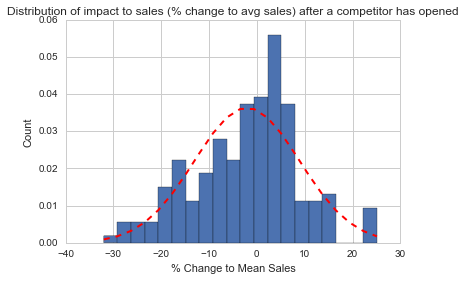

In [116]:
# Let's view the distribution of "change"

from scipy.stats import norm
import matplotlib.mlab as mlab
(mu, sigma) = norm.fit(impactToSales)

fig, ax = plt.subplots()
n, bins, patches = ax.hist(impactToSales, bins=20, normed=1)
y = mlab.normpdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=2)

ax.set_title("Distribution of impact to sales (% change to avg sales) after a competitor has opened")
plt.xlabel("% Change to Mean Sales")
plt.ylabel("Count")

**Note**: There doesn't seem to be a real impact to **average** sales after a competitor has opened.